In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Import data and take a first look

In [3]:
nba_players_data = pd.read_csv('..\\data\\csv\\nba_players_data.csv')
nba_players_data.head(10) 

,Players,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,LeBron James,37,LAL,NBA,PF,56,56,37.2,11.4,21.8,...,0.756,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3
1,Kevin Durant,33,BRK,NBA,PF,55,55,37.2,10.5,20.3,...,0.910,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9
2,Chris Paul,36,PHO,NBA,PG,65,65,32.9,5.6,11.3,...,0.837,0.3,4.0,4.4,10.8,1.9,0.3,2.4,2.1,14.7
3,Carmelo Anthony,37,LAL,NBA,PF,69,3,26.0,4.6,10.5,...,0.830,0.9,3.3,4.2,1.0,0.7,0.8,0.9,2.4,13.3
4,James Harden,32,TOT,NBA,PG,65,65,37.2,6.3,15.3,...,0.877,0.8,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0
5,Russell Westbrook,33,LAL,NBA,PG,78,78,34.3,7.0,15.8,...,0.667,1.4,6.0,7.4,7.1,1.0,0.3,3.8,3.0,18.5
6,Stephen Curry,33,GSW,NBA,PG,64,64,34.5,8.4,19.1,...,0.923,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5
7,Anthony Davis,28,LAL,NBA,C,40,40,35.1,9.3,17.4,...,0.713,2.7,7.2,9.9,3.1,1.2,2.3,2.1,2.4,23.2
8,Dwight Howard,36,LAL,NBA,C,60,27,16.2,2.2,3.7,...,0.658,2.0,4.0,5.9,0.6,0.6,0.6,0.8,1.9,6.2
9,LaMarcus Aldridge,36,BRK,NBA,C,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


Check for missing data

In [4]:
nba_players_data.isnull().sum()

Players    0
Age        0
Tm         0
Lg         0
Pos        0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

Looks like i dont have any missing values in my data

Lets see who is oldest player

(0.0, 50.0)

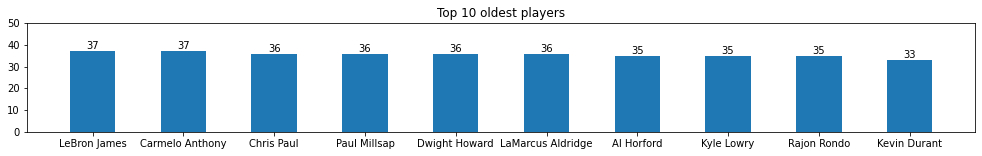

In [8]:
#Sort players by age
players_by_age = nba_players_data.sort_values(by='Age',ascending=False).reset_index()
plt.figure(figsize=(17,2))
# Create bars from Players and Age columns
plt.bar('Players','Age', data=players_by_age[:10], width=.5)
plt.title('Top 10 oldest players')
# add bar text 
for i in range(len(players_by_age[:10])):
    plt.text(i,players_by_age['Age'][i],players_by_age['Age'][i],ha='center',va='bottom')
plt.ylim(0,50)